In [34]:
from itertools import product
from typing import Dict, List, Any

import numpy as np
import matplotlib.pyplot as plt

from IOData.IOData import InputRule

from simulators.track_simulator import TrackSimulator
from simulators.simulation_settings import SafetyFilterTypes, TrackFilterTypes, SimulationInputRule, ModelType
from tools.simualtion_results import Results

from tools.simple_track_generator import trackGenerator

In [35]:
save_fig = False

simualte_type = 'TRACK_SIMULATE'

Simulator = {
    # 'SINGLE_CURVATURE'  : SingleCurvatureSimulator,
    'TRACK_SIMULATE'    : TrackSimulator,
}.get(simualte_type)

simulator = Simulator()
simulator.a_d_max = 3
simulator.delta_d_max = 0.2
simulator.use_saved_data = False
simulator.save_data = False
simulator.simulate_model_type = ModelType.KINEMATIC
simulator.data_model_type = ModelType.KINEMATIC
simulator.t_sim = 5
simulator.global_initial_state = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
simulator.cur = 1/0.3
simulator.track_fun_name = 'oval_track'

simulator.t_data = 10.0
simulator.data_input_rule = InputRule.RANDOM_2_WITH_MEAN

random_seeds = [0]
track_filter_types = [
    # TrackFilterTypes.SINGLE_SEGMENT_ADD_DATA,
    TrackFilterTypes.SINGLE_SEGMENT,
    ]
filter_types = [
    SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL,
    SafetyFilterTypes.INDIRECT_FITTING_TERMINAL,
    SafetyFilterTypes.INDIRECT_FIX_MU,
    SafetyFilterTypes.INDIRECT_ZERO_V,
    SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING,
    SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA,
    SafetyFilterTypes.INDIRECT_STOP,
    ]
filter_params: Dict[SafetyFilterTypes, List[Dict[str, Any]]] = {
    SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: [
        # {'lam_sig': 50000, 'L': 150, 'c': [[0.3, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
        {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.3, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    ], # good HP for this terminal ingredient and kinematic model
    SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: [
        # {'lam_sig': 50000, 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
        {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    ], # good HP for this terminal ingredient and kinematic model
    SafetyFilterTypes.INDIRECT_FIX_MU: [
        # {'lam_sig': 50000, 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
        {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    ], # good HP for this terminal ingredient and kinematic model
    SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING: [
        # {'lam_sig': 50000, 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
        {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.2, 0.05, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    ], # good HP for this terminal ingredient and kinematic model
    SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA: [
        # {'lam_sig': 50000, 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
        {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.2, 0.05, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    ], # good HP for this terminal ingredient and kinematic model
    SafetyFilterTypes.INDIRECT_ZERO_V: [
        # {'lam_sig': 50000, 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
        {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    ], # good HP for this terminal ingredient and kinematic model
    SafetyFilterTypes.INDIRECT_STOP: [
        # {'lam_sig': 50000, 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
        {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: [{'lam_sig': 10000}, {'lam_sig': 50000}, {'lam_sig': 100000}],
    # SafetyFilterTypes.INDIRECT_ZERO_V: [{'L': 80}],
    # SafetyFilterTypes.INDIRECT_STOP: [{'L': 80}],
    # SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: [{'lam_sig': 200000}],
    # SafetyFilterTypes.INDIRECT_FIX_MU: [
    #     # {'lam_sig': 50000, 'L': 150, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 150000, 'L': 100, 'R': np.matrix('1,0;0,0'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
    #     # {'lam_sig': 200000, 'L': 100, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
    #     ], 
    # SafetyFilterTypes.INDIRECT_ZERO_V: [ 
    #     {'lam_sig': 150000, 'L': 150, 'R': np.matrix('1,0;0,0'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
    #     # {'lam_sig': 200000, 'L': 200, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
    #     # {'lam_sig': 50000, 'L': 150, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]}
    #     ],
    # SafetyFilterTypes.INDIRECT_STOP: [{'lam_sig': 100000}],
    }
simulation_input_rules = [SimulationInputRule.MAX_THROTTLE]


dict_results = simulator.simulate_multi(random_seeds, track_filter_types, filter_types, filter_params, simulation_input_rules)


 
 Simulating random_seed=0, track_filter_type=TrackFilterTypes.SINGLE_SEGMENT, filter_type=SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL, simulation_input_type=SimulationInputRule.MAX_THROTTLE


/Users/huangyujun/Library/CloudStorage/OneDrive-ETHZurich/PersonalDocuments/2023SpringETH/DataDrivenSF/simulation/System/LATI.py:138: UserWarning: System not observable!
  warn("System not observable!")
/Users/huangyujun/Library/CloudStorage/OneDrive-ETHZurich/PersonalDocuments/2023SpringETH/DataDrivenSF/simulation/System/ErrorKinematicAcceLATI.py:157: UserWarning: mu is not in [-pi/2, pi/2]
  warn('mu is not in [-pi/2, pi/2]')


vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!
vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to segment 4!

 
 Simulating random_seed=0, track_filter_type=TrackFilterTypes.SINGLE_SEGMENT, filter_type=SafetyFilterTypes.INDIRECT_FITTING_TERMINAL, simulation_input_type=SimulationInputRule.MAX_THROTTLE
Fited steady state input: [ 0.         -0.00184917]
Fited steady state output: [ 0.         -0.03054604  0.        ]
Fited steady state input: [0.         0.29629381]
Fited steady state output: [ 0.         -0.17205881  0.        ]
Fited steady state input: [ 0.         -0.00184917]
Fited steady state output: [ 0.         -0.03054604  0.        ]
Fited steady state input: [0.         0.29629381]
Fited steady state output: [ 0.         -0.17205881  0.        ]
Fited steady state input: [ 0.         -0.00184917]
Fited steady state output: [ 0.        

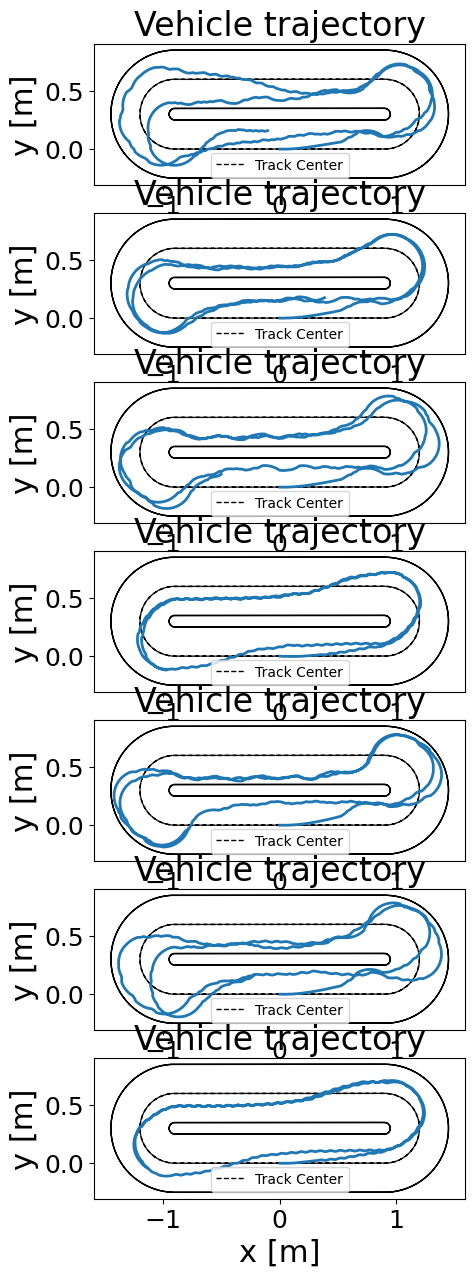

In [36]:
# plot global trajectory and track
random_seed = random_seeds[0]
n_rows, n_cols = len(filter_types), len(simulation_input_rules)
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, squeeze=False, figsize=(20*n_rows,15*n_cols))
for i, j in product(range(n_rows), range(n_cols)):
    results = dict_results[(random_seed, track_filter_types[0], filter_types[i], simulation_input_rules[j])][0]
    if results is not None:
        results.plot_vehicle_trajectory(ax=axs[i,j], gen=simulator.track_generator)
plt.show()
if save_fig:
    fig.savefig('track_simulation.png')

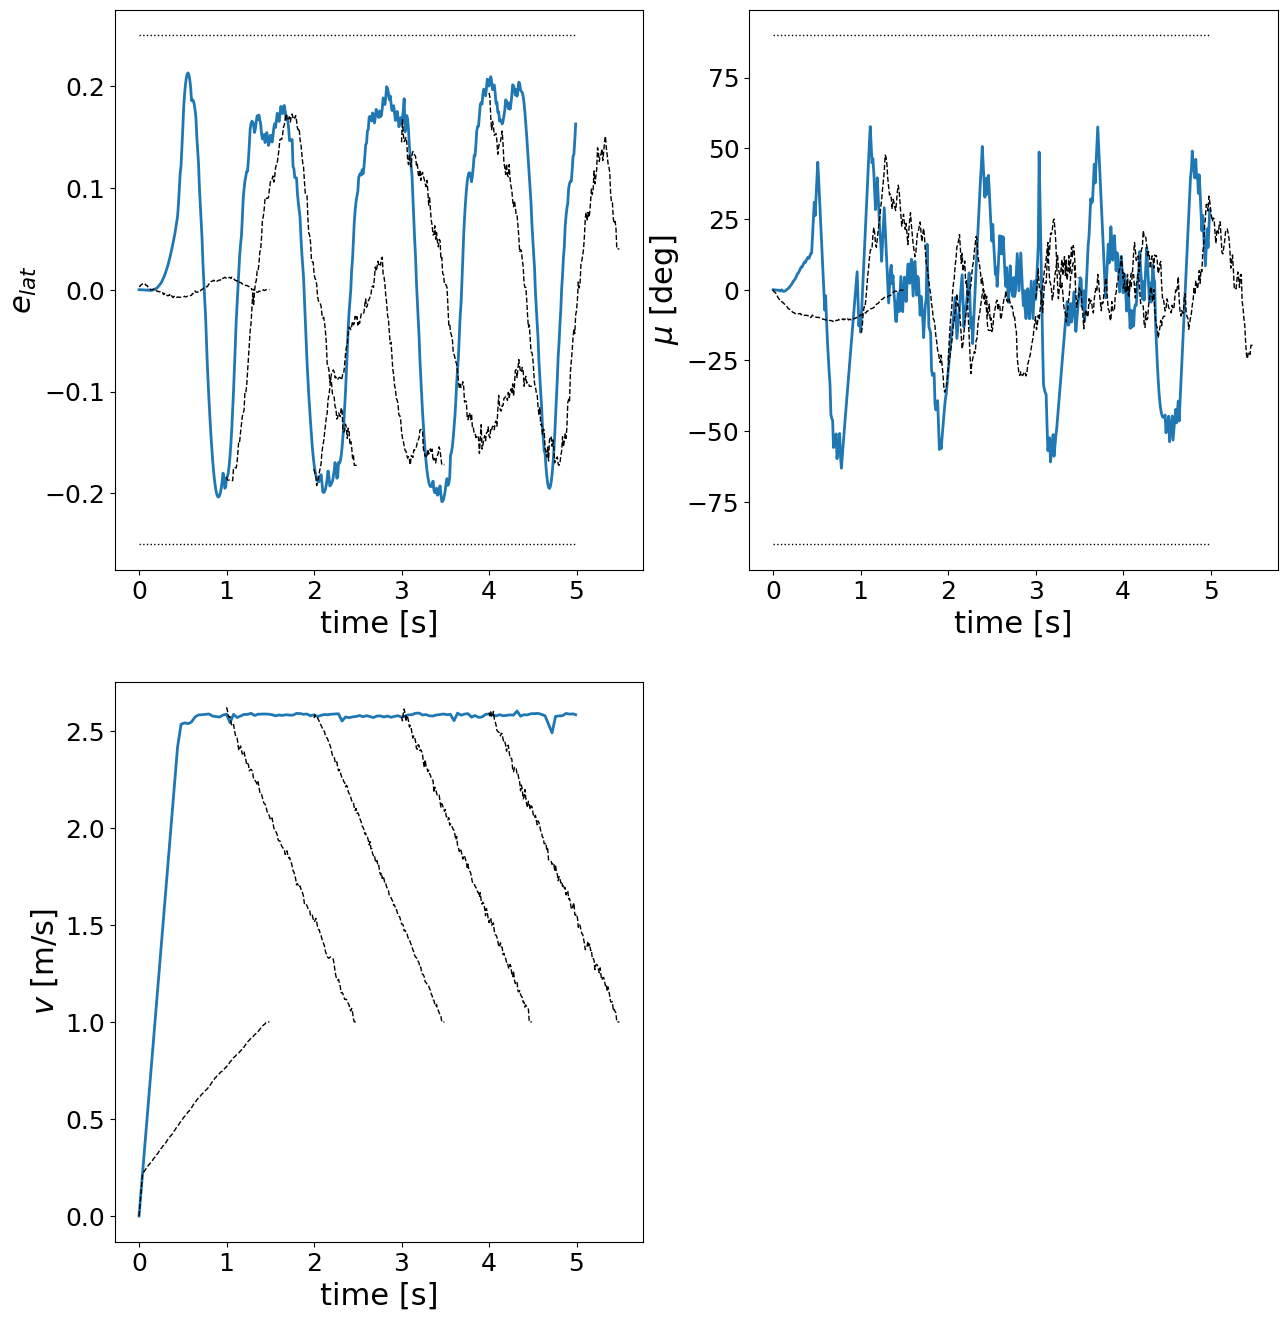

In [37]:
# choose one result to plot details
results = dict_results[(random_seed, track_filter_types[0], SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA, simulation_input_rules[0])][0]
# results = dict_results[(random_seed, track_filter_types[0], SafetyFilterTypes.INDIRECT_ZERO_V, simulation_input_rules[0])][0]

# plot given error dynamics trajectory
plt.figure(figsize=(15,16))
#velocity input
ax = plt.subplot(221)
results.plot_error_trajectory(0, ax, constraint=(-simulator.track_width/2, simulator.track_width/2))
results.plot_predicted_error_slices(0, ax)
ax = plt.subplot(222)
results.plot_error_trajectory(1, ax, constraint=(simulator.mu_min*180/np.pi, simulator.mu_max*180/np.pi))
results.plot_predicted_error_slices(1, ax)
ax = plt.subplot(223)
results.plot_error_trajectory(2, ax)
results.plot_predicted_error_slices(2, ax)
plt.show()

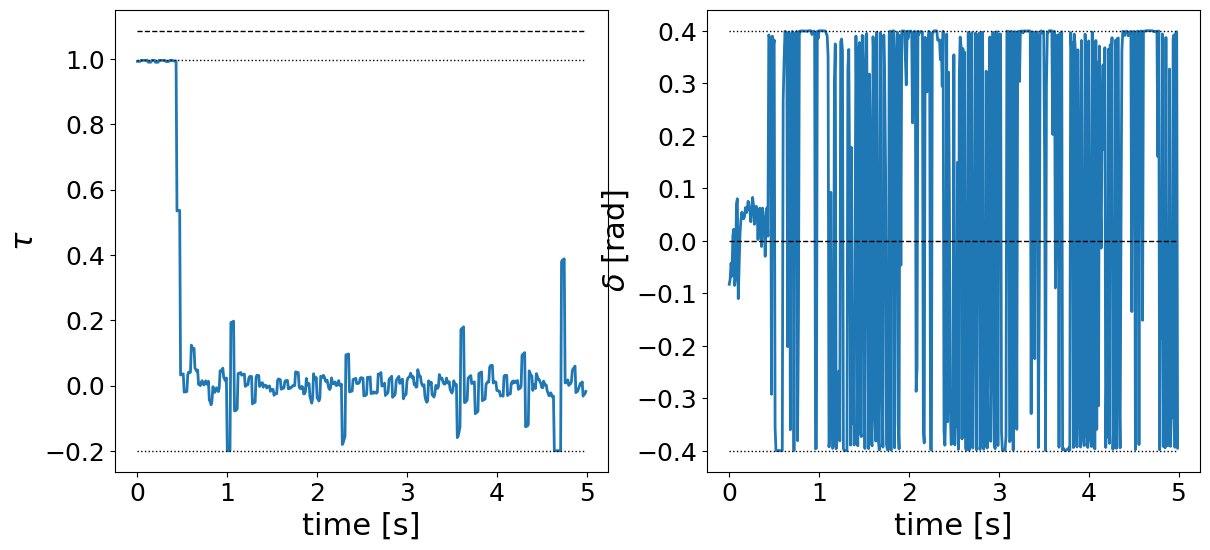

In [38]:
# plot given and applied inputs
plt.figure(figsize=(14,6))
ax = plt.subplot(121)
results.plot_input_applied(0, ax, constraint=(simulator.a_min*simulator.m, simulator.a_max*simulator.m))
results.plot_input_obj(0, ax)
ax = plt.subplot(122)
results.plot_input_applied(1, ax, constraint=(-simulator.delta_max, simulator.delta_max))
results.plot_input_obj(1, ax)
plt.show(block=True)

In [39]:
sigma_max = results.calculate_sigma_infty_value()
print(sigma_max)

(5.596157435783233e-07, 0.04076094256322427)


In [40]:
sigma_max[1]/np.pi*180

2.33542997784791

In [41]:
def plot_average_itervention(ax: plt.Axes, results: Dict[TrackFilterTypes, Results]) -> plt.Axes:
    """Plot the average intervention for the input corresponds to the input."""
    width = 0.3 # width of bar

    x = np.arange(len(results))
    input_names = ['Torque', 'steering']

    offset = -width/2
    rects = ax.bar(x + offset, [round(result.average_intervention[0],2) for result in results.values()], width, label=input_names[0], color='tab:blue')
    ax.bar_label(rects, padding=3)
    ax.set_ylim(0, 1.5)
    ax.set_ylabel('Torque Intervention')
    ax.legend(loc='upper left', ncols=2)

    ax = ax.twinx()  # instantiate a second axes that shares the same x-axis
    offset = width/2
    rects = ax.bar(x + offset, [round(result.average_intervention[1],2) for result in results.values()], width, label=input_names[1], color='tab:red', hatch='///')
    ax.bar_label(rects, padding=3)
    ax.set_ylim(0, 0.5)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Steering Intervention')
    ax.set_title('MSR Input Intervention for Different Terminal Ingredients')
    ax.set_xticks(x, [key.value for key in results.keys()])
    ax.legend(loc='upper right', ncols=2)
    

{<SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: 'fix mu and \n add data'>: <tools.simualtion_results.Results object at 0x14af6af10>, <SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: 'fitting steady state'>: <tools.simualtion_results.Results object at 0x14e6e2dc0>, <SafetyFilterTypes.INDIRECT_FIX_MU: 'fix mu'>: <tools.simualtion_results.Results object at 0x111f06940>, <SafetyFilterTypes.INDIRECT_ZERO_V: 'stop at \n center line'>: <tools.simualtion_results.Results object at 0x111f06880>, <SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING: 'fix mu with weighting'>: <tools.simualtion_results.Results object at 0x14ddfcdc0>, <SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA: 'fix mu with\n weighting and add data'>: <tools.simualtion_results.Results object at 0x111339610>, <SafetyFilterTypes.INDIRECT_STOP: 'stop anywhere \n on the track'>: <tools.simualtion_results.Results object at 0x14ef6f1f0>}


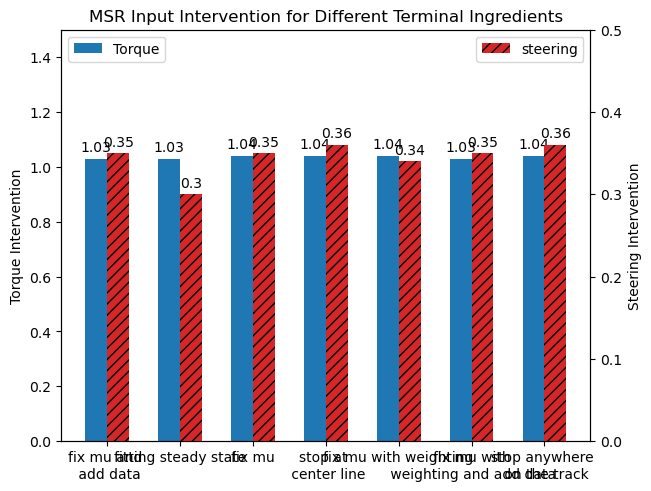

In [42]:
results_dict_filter_types = {
    key[2]: result_list[0] for key, result_list in dict_results.items()
}
print(results_dict_filter_types)
fig, ax = plt.subplots(layout='constrained')

ax = plot_average_itervention(ax, results_dict_filter_types)

In [43]:
simulator.systems[0].get_noise()

matrix([[ 0.0014617 ],
        [-0.00052052],
        [ 0.00371427]])

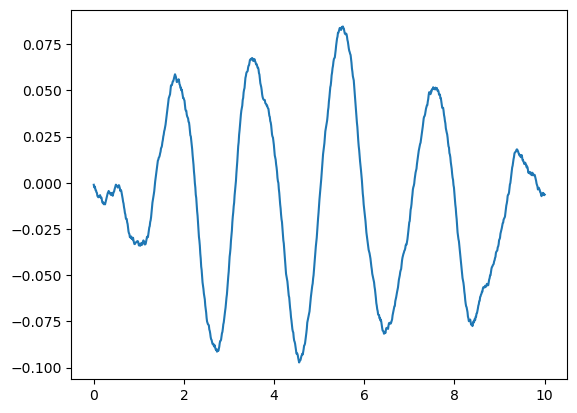

In [44]:
io_data = simulator.io_data_dict[1/0.3]

plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[0,0] for y in io_data._output_data])

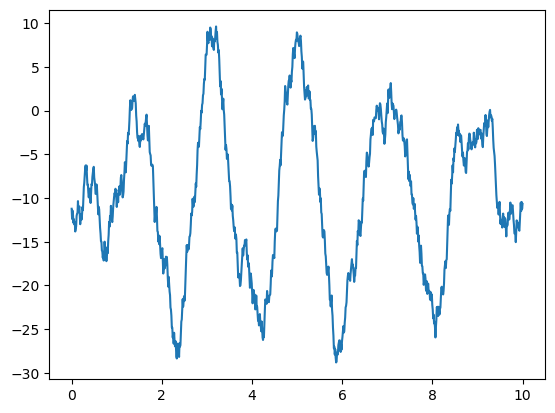

In [45]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[1,0]*180/np.pi for y in io_data._output_data])

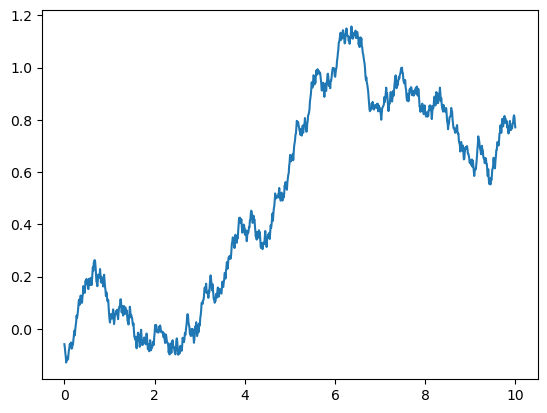

In [46]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[2,0] for y in io_data._output_data])

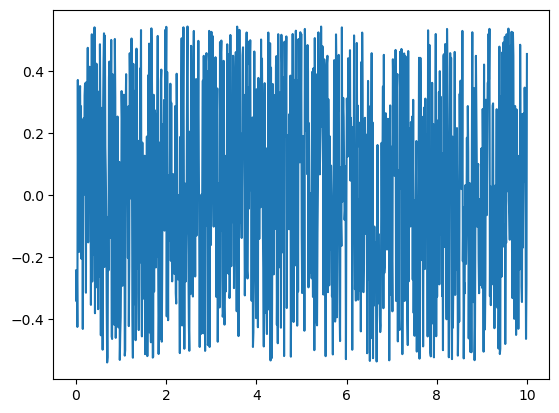

In [47]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [u[0,0] for u in io_data._input_data])

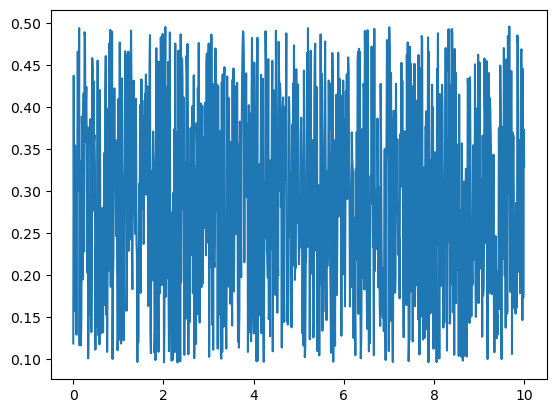

In [48]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [u[1,0] for u in io_data._input_data])

In [49]:
print(simulator.systems[1].get_zero_input())
print(simulator.systems[1].get_zero_state())

[0.         0.29568153]
[ 0.         -0.17421323  1.          0.        ]


In [50]:
U, S, V = np.linalg.svd(io_data.H_input)
print(S)

[118.24606455  13.83858774  13.82003117  13.70916412  13.56213838
  13.53690001  13.16590496  12.95852729  12.88797392  12.86723351
  12.81160946  12.77478838  12.49421622  12.4756777   12.46396447
  12.45084818  12.34045027  12.31287368  12.29425441  12.25227695
  11.98696275  11.98015278  11.82567103  11.81640099  11.78870257
  11.7597285   11.75231853  11.58872016  11.56781805  11.55001898
  11.52364129  11.38007817  11.36473639  11.35608577  11.33058771
  11.23935747  11.20620003  11.17107784  11.04445717  11.02210105
  10.94893498  10.92037665  10.91455948  10.88418792  10.87891756
  10.8362928   10.77755917  10.64061938  10.61497928  10.55556088
  10.41182163  10.38605211  10.31485639  10.22571581  10.21791364
  10.18742792  10.1583063   10.13559928  10.12867804  10.08229675
  10.07954738  10.05672195  10.05390676  10.05136615  10.0004484
   9.98972376   9.9059185    9.88934884   9.87156561   9.85029442
   9.79525655   9.77916769   9.75726217   9.73022327   9.72761416
   9.720671